In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Plotting settings
FIG_SIZE = (3.5, 8)

latex_preamble = [
    r'\usepackage{amsfonts}',
    r'\usepackage{amssymb}',
    r'\usepackage{amsmath}',
]

plt.rcParams.update({
    "grid.alpha": 0.5,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "legend.frameon": False,
    "ytick.labelsize": 8,
    "xtick.labelsize": 8,
    "font.size": 9,
    "font.family": "sans",
    "font.sans-serif": ["Computer Modern Roman"],
    "text.usetex": True,
    "text.latex.preamble": "".join(latex_preamble)
})

In [14]:
# Load logs
fields = {
    "BRANCHES": {"type": int, "label": r"B\&B \\ tree branches [\#]"},
    "RELAXS": {"type": int, "label": r"B\&B \\ tree nodes [\#]"},
    "ACT_NDS": {"type": int, "label": "active nodes"},
    "DEPTH": {"type": int, "label": r"B\&B tree depth"},
    "BEST_INT_OBJ": {"type": float, "label": "best int. obj."},
    "BEST_RELAX_OBJ": {"type": float, "label": "relax int. obj."},
}
column_types = {field: value["type"] for field, value in fields.items()} | {"TIME": float}
problem_types = {
    "linear": pd.read_csv("log/linear.csv", dtype=column_types), 
    "MIQP": pd.read_csv("log/miqp.csv", dtype=column_types)
}

for prob in problem_types.values():
    # Clear up headers
    prob.columns = prob.columns.str.strip()
    
    # The optimization problem's sense is reversed
    # prob["BEST_INT_OBJ"] = -prob["BEST_INT_OBJ"]
    # prob["BEST_RELAX_OBJ"] = -prob["BEST_RELAX_OBJ"]

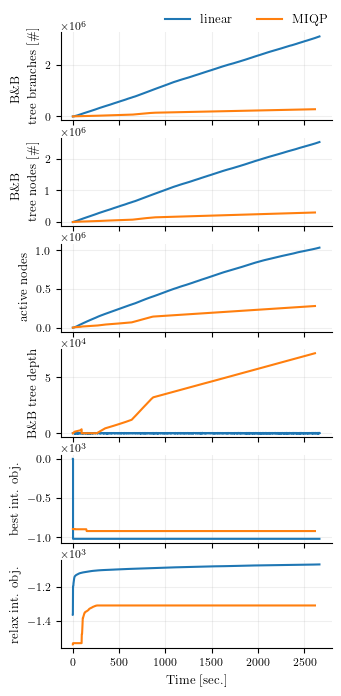

In [15]:
fig, axs = plt.subplots(6, figsize=FIG_SIZE, sharex=True)
for label,prob in problem_types.items():
    for i,(field,value) in enumerate(fields.items()):
        axs[i].ticklabel_format(axis="y", scilimits=(3,4))
        axs[i].plot(prob["TIME"], prob[field], label=label)
        axs[i].grid(alpha=0.2)
        axs[i].set_ylabel(value["label"])
        
        
plt.xlabel("Time [sec.]")
axs[0].legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower right", borderaxespad=0, ncol=2, frameon=False)

plt.savefig("pdf/mixed_integer_results.pdf", bbox_inches="tight")
plt.show(block=False)

In [51]:
columns_type.keys() - {"TIME", "BEST_RELAX_OBJ"}

{'ACT_NDS', 'BEST_INT_OBJ', 'BRANCHES', 'DEPTH', 'RELAXS'}